In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import scipy.stats

In [3]:
rentals = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv")

In [4]:
rentals.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [5]:
rentals.no_fee.replace({1:'yes', 0:'no'},inplace=True)
rentals.has_roofdeck.replace({1:'yes', 0:'no'},inplace=True)
rentals.has_washer_dryer.replace({1:'yes', 0:'no'},inplace=True)
rentals.has_doorman.replace({1:'yes', 0:'no'},inplace=True)
rentals.has_elevator.replace({1:'yes', 0:'no'},inplace=True)
rentals.has_dishwasher.replace({1:'yes', 0:'no'},inplace=True)
rentals.has_gym.replace({1:'yes', 0:'no'},inplace=True)
rentals.drop(columns=['rental_id','building_id'], inplace=True)

In [6]:
rentals.describe(include='all')

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000,5000,5000,5000,5000.000000,5000,5000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,NaN,2,93,15,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,NaN,no,Upper West Side,All Downtown,Manhattan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2852,4357,4331,3860,3800,4222,NaN,4281,579,1229,3539
mean,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,NaN,NaN,NaN,NaN,NaN,NaN,0.045600,NaN,NaN,NaN,NaN
std,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,NaN,NaN,NaN,NaN,NaN,NaN,0.208637,NaN,NaN,NaN,NaN
min,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
75%,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN


# Univariate (one variable)

## Quantitative

In [7]:
rent_mean = rentals.rent.mean()
print(rent_mean)

4536.9208


In [8]:
rent_median = rentals.rent.median()
print(rent_median)

3600.0


In [9]:
rent_mode = rentals.rent.mode()
print(rent_mode)

0    3500
dtype: int64


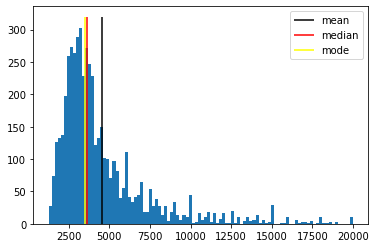

In [10]:
plt.hist(rentals.rent, bins = 100)
plt.vlines(x = rent_mean, ymin = 0, ymax = 320, colors = 'k', label='mean')
plt.vlines(x = rent_median, ymin = 0, ymax = 320, colors = 'red', label='median')
plt.vlines(x = rent_mode, ymin = 0, ymax = 320, colors = 'yellow', label='mode')
plt.legend()
plt.show()

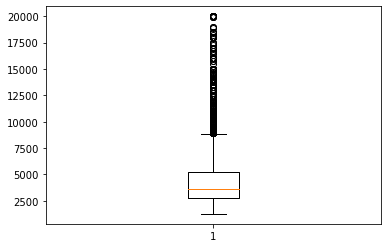

In [11]:
plt.boxplot(rentals.rent)
plt.show()

In [12]:
scipy.stats.trim_mean(rentals.rent, .1)

3980.253

In [13]:
np.min(rentals.rent)

1250

In [14]:
np.max(rentals.rent)

20000

In [15]:
np.std(rentals.rent)

2929.5459546024153

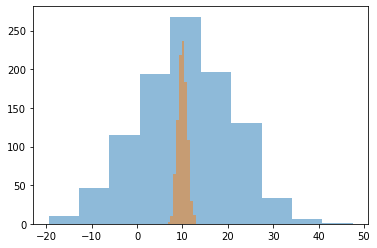

In [16]:
small_std = np.random.normal(10, 1, 1000)
large_std = np.random.normal(10, 10, 1000)

plt.hist(large_std, alpha=0.5)
plt.hist(small_std, alpha=0.5)
plt.show()

## Categorical

In [17]:
rentals.borough.value_counts(normalize=True)

Manhattan    0.7078
Brooklyn     0.2026
Queens       0.0896
Name: borough, dtype: float64

In [18]:
rentals.loc[0, 'borough'] = np.nan

In [19]:
rentals.borough.value_counts(normalize=True, dropna = False)

Manhattan    0.7076
Brooklyn     0.2026
Queens       0.0896
NaN          0.0002
Name: borough, dtype: float64

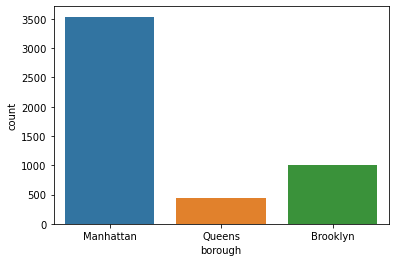

In [20]:
sns.countplot(data = rentals, x='borough')
plt.show()

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

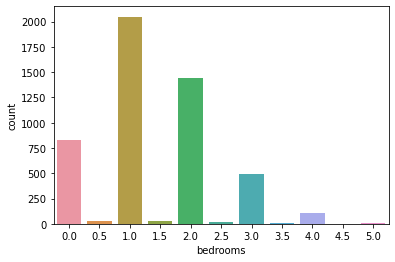

In [21]:
sns.countplot(x=rentals.bedrooms)

<AxesSubplot:xlabel='has_washer_dryer', ylabel='count'>

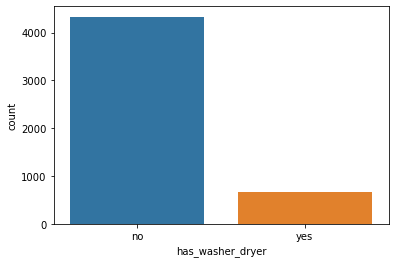

In [22]:
sns.countplot(x=rentals.has_washer_dryer)

## Associate variables

In [23]:
rentals.groupby('borough').mean().rent

borough
Brooklyn     3327.403751
Manhattan    5139.672131
Queens       2516.147321
Name: rent, dtype: float64

In [24]:
rentals.groupby('borough').median().rent

borough
Brooklyn     3000.0
Manhattan    4000.0
Queens       2350.0
Name: rent, dtype: float64

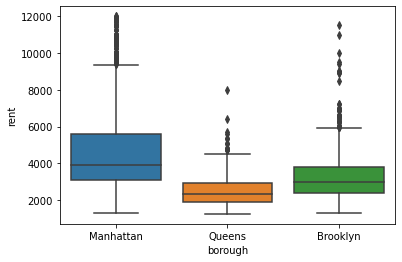

In [25]:
sns.boxplot(data = rentals[rentals.rent<12000], x='borough', y='rent')
plt.show()

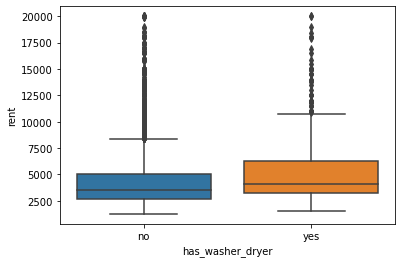

In [26]:
sns.boxplot(data = rentals, x='has_washer_dryer', y='rent')
plt.show()

In [27]:
rentals.groupby('has_washer_dryer').median().rent

has_washer_dryer
no     3500.0
yes    4100.0
Name: rent, dtype: float64

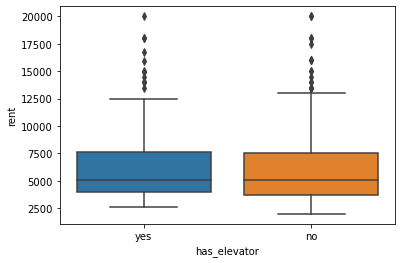

In [28]:
sns.boxplot(data = rentals[rentals.floor>30], x='has_elevator', y='rent')
plt.show()

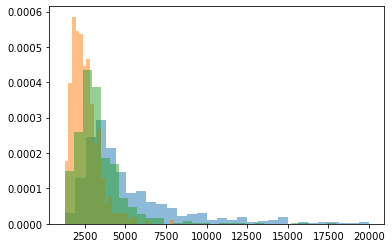

In [29]:
plt.hist(rentals.rent[rentals.borough=="Manhattan"], label='Manhattan', bins=30, density=True, alpha=.5)
plt.hist(rentals.rent[rentals.borough=="Queens"], label='Manhattan', bins=30, density=True, alpha=.5)
plt.hist(rentals.rent[rentals.borough=="Brooklyn"], label='Manhattan', bins=30, density=True, alpha=.5)
plt.show()

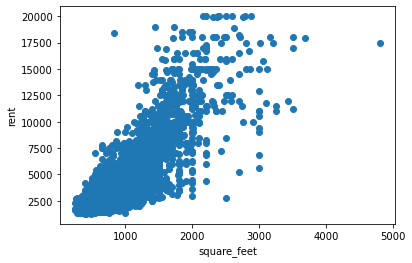

In [32]:
plt.scatter(rentals.size_sqft, rentals.rent)
plt.xlabel('square_feet')
plt.ylabel('rent')
plt.show()

In [33]:
from scipy.stats import pearsonr
pearsonr(rentals.size_sqft, rentals.rent)

(0.8087835060658337, 0.0)

In [34]:
rentals.corr()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,has_patio
rent,1.000000,0.531200,0.733644,0.808784,0.003652,0.272351,-0.122302,0.058260
bedrooms,0.531200,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329,0.003772
bathrooms,0.733644,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050,0.057091
size_sqft,0.808784,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434,0.036600
min_to_subway,0.003652,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273,-0.005652
floor,0.272351,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757,0.068119
building_age_yrs,-0.122302,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000,-0.048155
has_patio,0.058260,0.003772,0.057091,0.036600,-0.005652,0.068119,-0.048155,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'rent'),
  Text(0, 1.5, 'bedrooms'),
  Text(0, 2.5, 'bathrooms'),
  Text(0, 3.5, 'size_sqft'),
  Text(0, 4.5, 'min_to_subway'),
  Text(0, 5.5, 'floor'),
  Text(0, 6.5, 'building_age_yrs'),
  Text(0, 7.5, 'has_patio')])

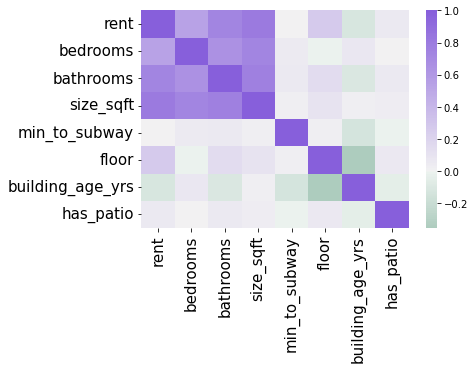

In [35]:
colors = sns.diverging_palette(150, 275, as_cmap=True)

sns.heatmap(rentals.corr(), center=0, cmap=colors)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

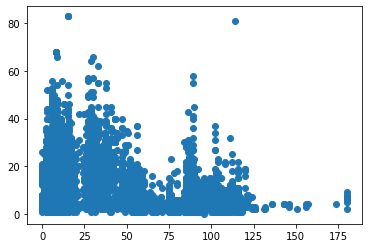

In [38]:
plt.scatter(rentals.building_age_yrs, rentals.floor)
plt.xlabel='building_age_yrs'
plt.ylabel='floor'
plt.show()

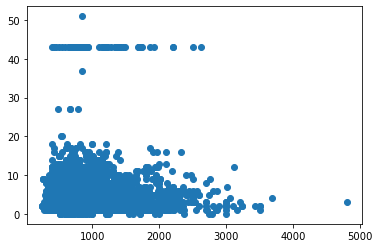

In [39]:
plt.scatter(rentals.size_sqft, rentals.min_to_subway)
plt.xlabel='size_sqft'
plt.ylabel='min_to_subway'
plt.show()

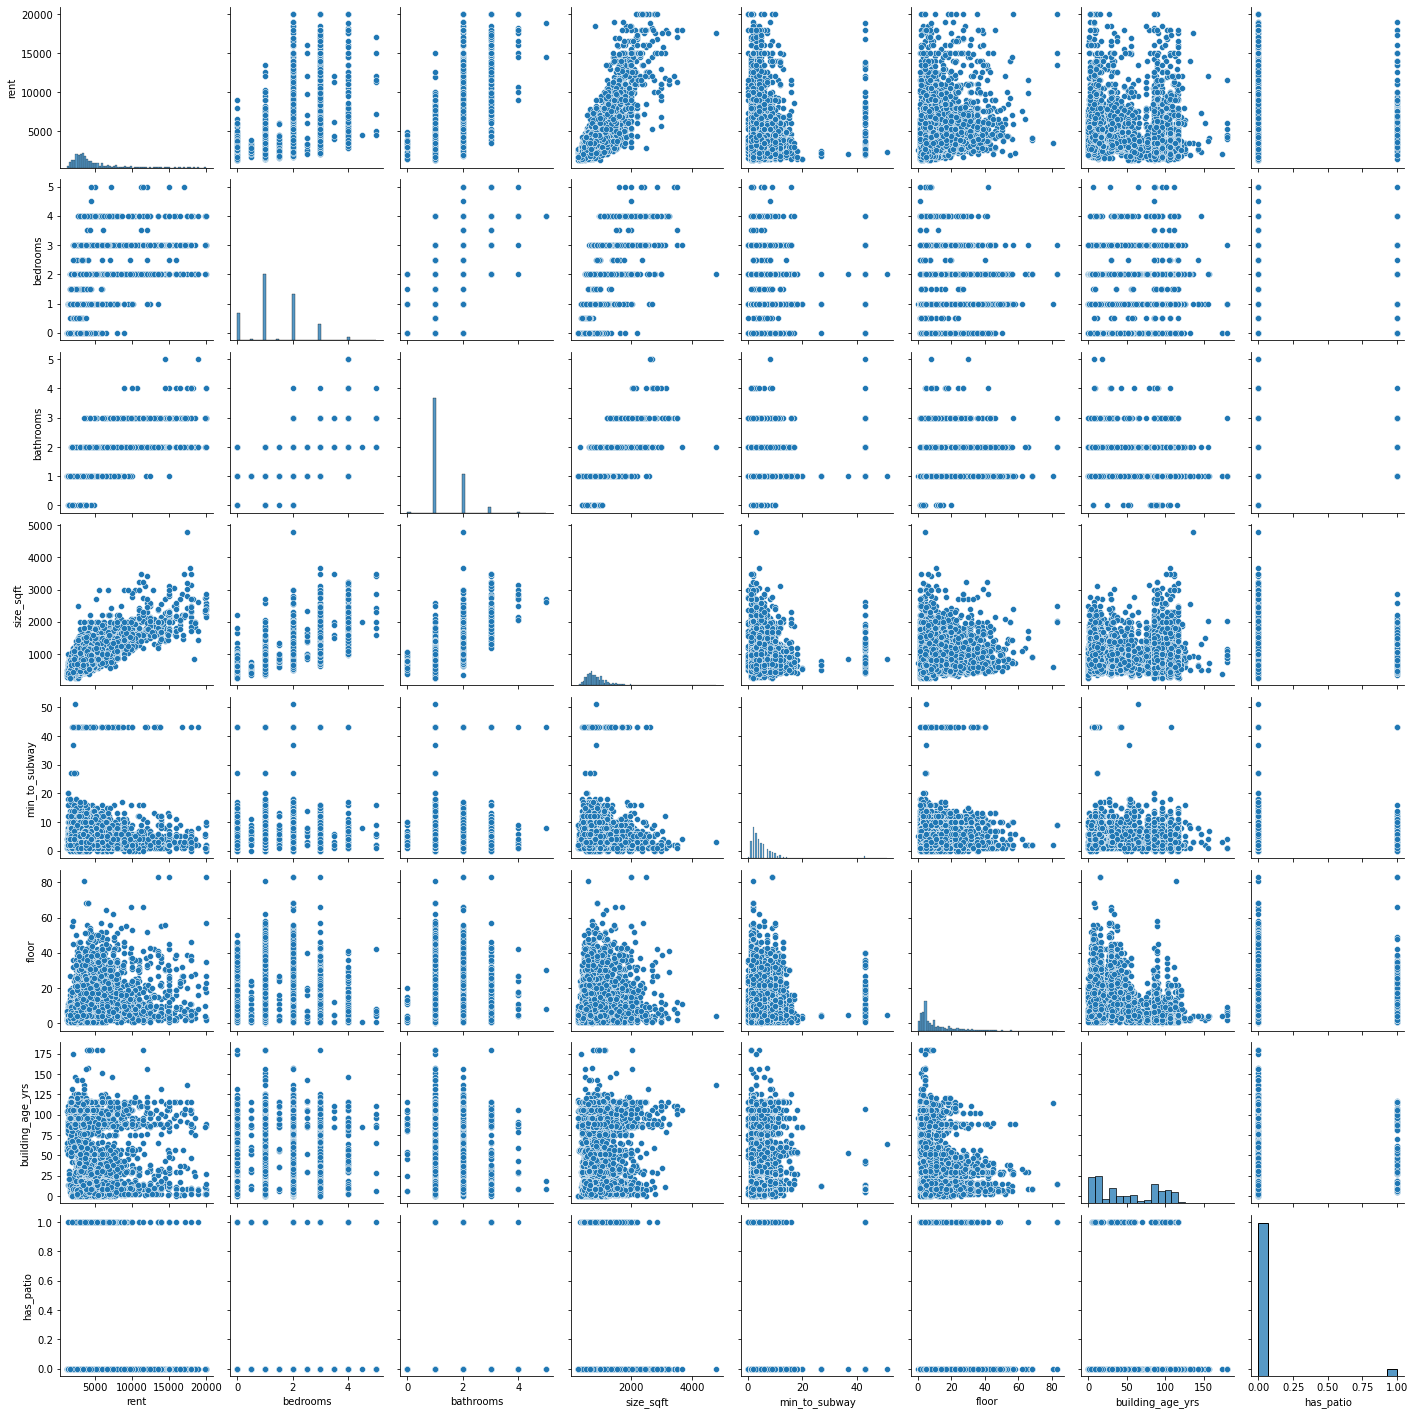

In [40]:
sns.pairplot(rentals)
plt.show()

In [41]:
pd.crosstab(rentals.has_elevator,rentals.has_gym)

has_gym,no,yes
has_elevator,,
no,3748,52
yes,533,667


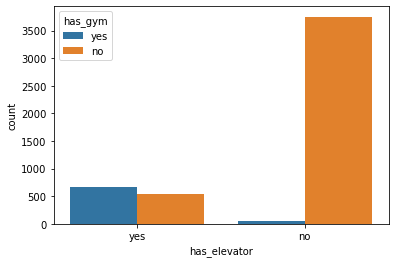

In [42]:
sns.countplot(x='has_elevator', hue='has_gym', data=rentals)
plt.show()

In [44]:
from scipy.stats import chi2_contingency
Xtab = pd.crosstab(rentals.has_elevator,rentals.has_gym)
chi2_contingency(Xtab)

(2172.798470720333,
 0.0,
 1,
 array([[3253.56,  546.44],
        [1027.44,  172.56]]))

In [45]:
Xtab

has_gym,no,yes
has_elevator,,
no,3748,52
yes,533,667
